# Titanic - Machine Learning from Disaster 🌊
Dataset Source: https://www.kaggle.com/competitions/titanic
<br><br>
Stanley Nathanael Wijaya - 2702217125

## Task Description

You are a data scientist tasked with analyzing the Titanic dataset.
<br><br>
The ultimate goal of your analysis is to build a model that can predict which passengers survived the Titanic disaster
<br>
(https://www.kaggle.com/competitions/titanic)
<br><br>
Your objective is to build a logistic regression model to predict the binary outcome of survival for the Titanic passengers.
<ul>
    <li>Split the dataset into a training set and a testing set to evaluate your model's performance (70:30).</li>
    <li>Develop a logistic regression model using your selected features.</li>
    <li>Evaluate the performance of your logistic regression model using metrics such as accuracy, precision, recall, and the ROC-AUC score.</li>
    <li>Provide a detailed analysis of the confusion matrix to understand the true positives, false positives, true negatives, and false negatives.</li>
</ul>

## Import Library

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.impute import SimpleImputer

## Read Data

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('gender_submission.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
sample_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Total data: 891 datas
- Age = 177 NA values
- Cabin = 687 NA values
- Embarked 2 NA values

In [10]:
train.shape

(891, 12)

In [11]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
print("Number of Duplicate: ", train.duplicated().sum())

Number of Duplicate:  0


So in this notebook, I will use train.csv data to EDA and Data Preprocess that

## Exploratory Data Analysis

### Column Types
- **Numerical** - Age, PassengerId, Fare 
- **Categorical** - Survived, Pclass, Sex, SibSp, Parch, Embarked  
- **Mixed (mix of both numerical and categorical)** - Name, Ticket, Cabin

### Age Column

### Analysis on Numerical Columns - *Age*

In [13]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [14]:
train['Age'].loc[train['Age'].isna()]

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

There are 177 NA datas in the Age column

In [15]:
imputer = SimpleImputer(strategy="mean")
train['Age'] = imputer.fit_transform(train[['Age']])

In [16]:
train['Age'].loc[train['Age'].isna()]

Series([], Name: Age, dtype: float64)

In [17]:
train['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

### Visualizations

<Axes: ylabel='Frequency'>

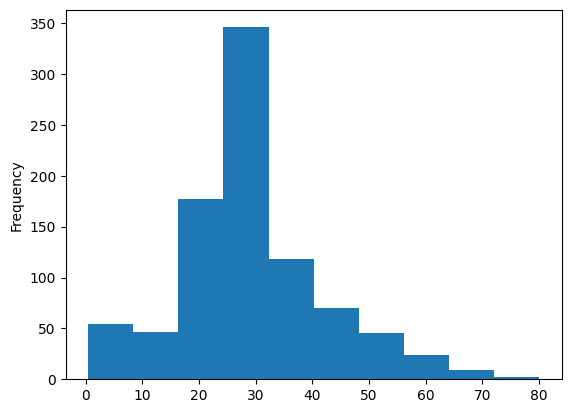

In [18]:
train['Age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

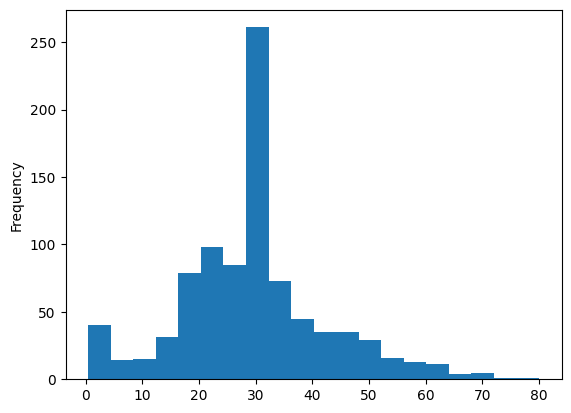

In [19]:
train['Age'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

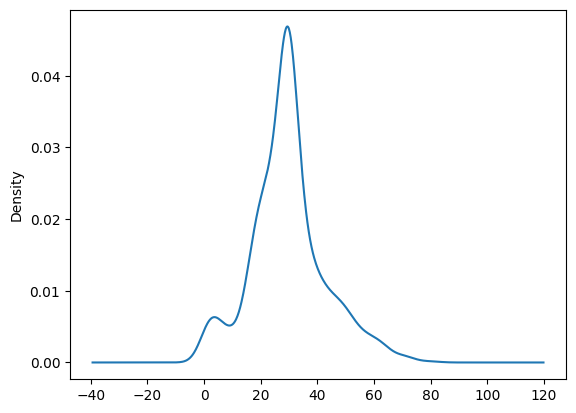

In [20]:
### kde plot
train['Age'].plot(kind='kde')

In [21]:
train['Age'].skew()

0.4344880940129925

In [22]:
train[train['Age'] > 65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [23]:
train['Age'].isna().sum()


0

In [24]:
train['Age'].isnull().sum()/len(train['Age'])

0.0

#### Age
**Conclusions**

- Age is almsot normally distributed
- 19.8% of the values are missing
- There are some outliers
- There are 177 null values, however I fill/replace the NA values with Mean of the 'Age' column

### Fare column

### Univariate Analysis on Numerical Columns - *Fare*

Univariate adalah ia an analysis technique to make the variable independent.

In [25]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

### Visualization

<Axes: ylabel='Frequency'>

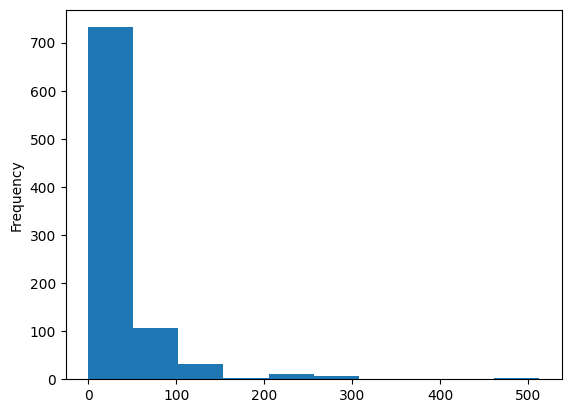

In [26]:
train['Fare'].plot(kind='hist')

In [27]:
train['Fare'].skew()

4.787316519674893

In [28]:
train[train['Fare'] > 200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.000000,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.000000,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.000000,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.000000,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.000000,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.000000,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.000000,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.000000,1,4,19950,263.0000,C23 C25 C27,S


In [29]:
train[train['Fare'] > 300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [30]:
train['Fare'].isnull().sum()

0

#### Fare
**Conclusion**
- The data is highly (positive) and skewed (right skewed)
- The more you pay, the more you survived :)

### Analysis on Categorical Columns 

### Survived

In [31]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

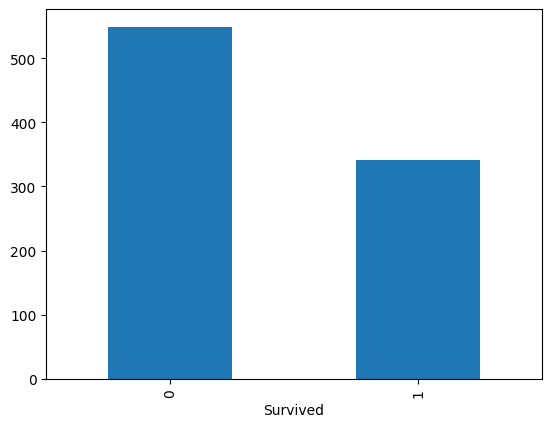

In [32]:
train['Survived'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

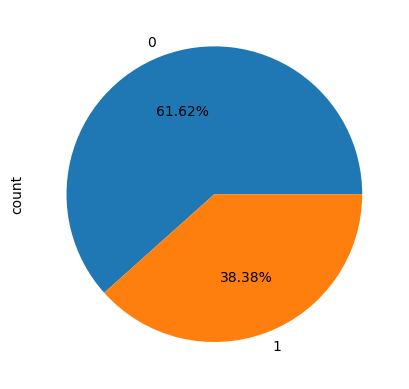

In [33]:
train['Survived'].value_counts().plot(kind='pie', autopct='%.2f%%')

In [34]:
train['Survived'].isnull().sum()

0

#### Survived
**Conclusion**
- More than 60% (61.62%) people couldn't survived and only 38% people survived.
- Survived (0) means couldn't survived however Survived (1) means survived.
- There is no any missing values

### PClass

In [35]:
train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass'>

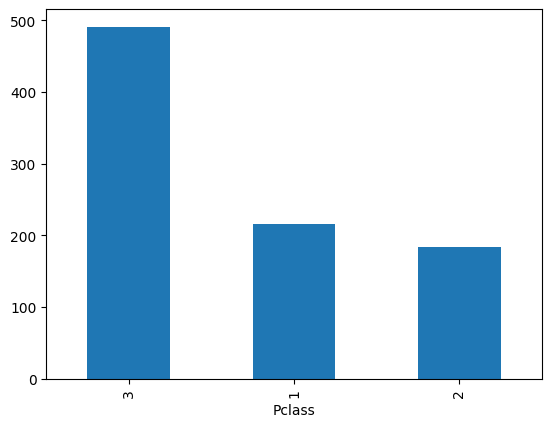

In [36]:
train['Pclass'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

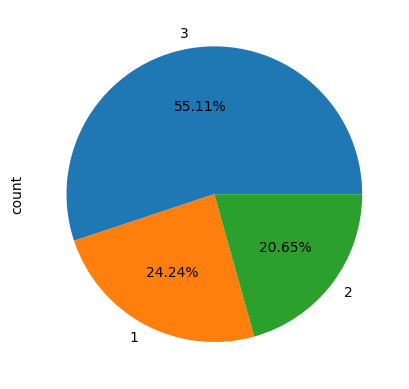

In [37]:
train['Pclass'].value_counts().plot(kind='pie', autopct='%.2f%%')

In [38]:
train['Pclass'].isnull().sum()

0

#### Pclass
**Conclusion**
- There are 3 types of class 1 (highest), 2 (medium), 3(lowest)
- 55% in class 3, 20% in class 2 and 24% in class 1.
- There is no any null value

### Sex

In [39]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex'>

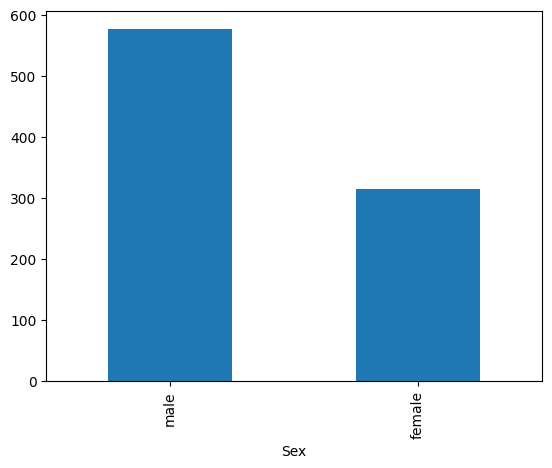

In [40]:
train['Sex'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

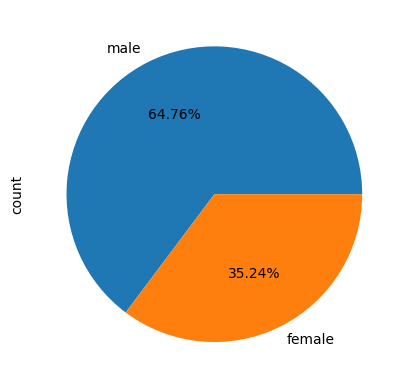

In [41]:
train['Sex'].value_counts().plot(kind='pie', autopct='%.2f%%')

In [42]:
train['Sex'].isnull().sum()

0

#### Sex
**Conclusion**
- There are 64.76% of total are Male and 35% are Female.
- No null value

### SibSp (Total persons traveling single, two, three etc)

In [43]:
train['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp'>

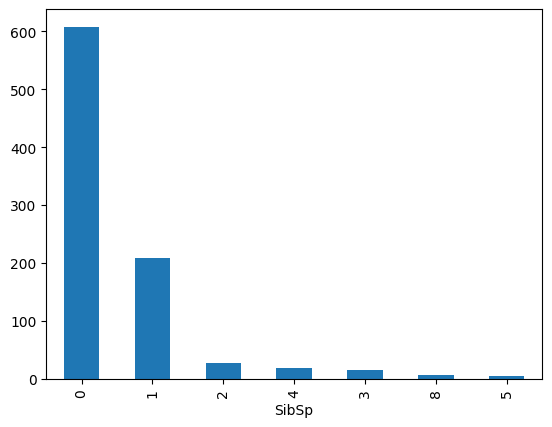

In [44]:
train['SibSp'].value_counts().plot(kind='bar')

In [45]:
train['SibSp'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

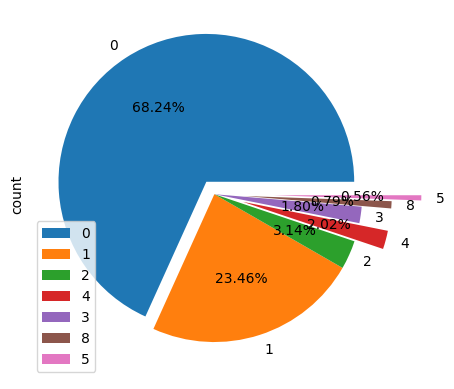

In [46]:
ex = [0.1,0,0,0.2,0,0.2,0.4]
labels = [0,1,2,4,3,8,5]
train['SibSp'].value_counts().plot(kind='pie', autopct='%.2f%%',explode=ex)
plt.legend(labels,loc='best')

In [47]:
train['SibSp'].isnull().sum()

0

#### SibSp
**Conclusion**
- Highest 68% of people are travelling single then with one
- No null value

### Parch (is parent or child travelling)

In [48]:
train['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch'>

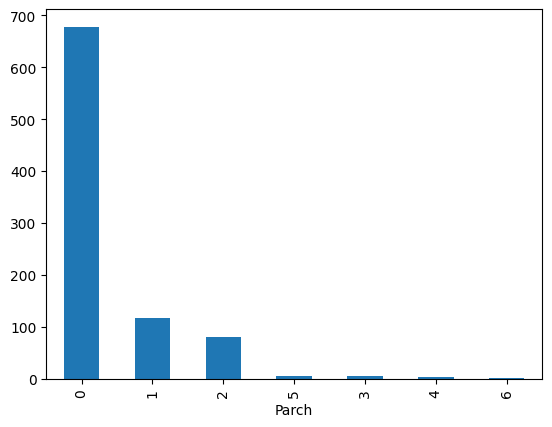

In [49]:
train['Parch'].value_counts().plot(kind='bar')

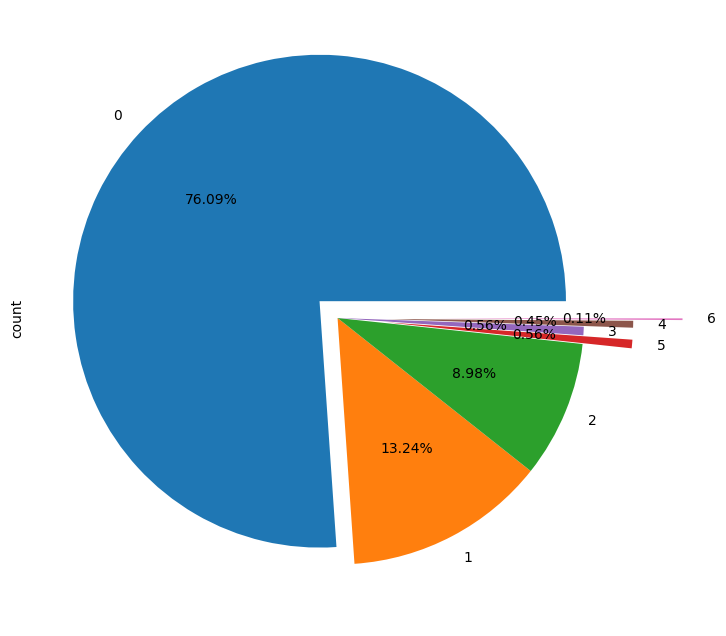

In [50]:
plt.figure(figsize=(8,8))
train['Parch'].value_counts().plot(kind='pie', autopct='%.2f%%',explode=ex)
plt.show()

In [51]:
train['Parch'].isnull().sum()

0

### Parch
**Conclusion**
- Maximum size of Parch is 6 (means max 6 people are travelling together total 7)
- Highest 76% of people are alone and Lowest 0.11% people are with 6
- Parch and SibSp cols can be merged together to form a new col called family_size
- Create a new col is_alone (to check is passenger is alone)

### Embarked

In [52]:
train["Embarked"]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [53]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [54]:
train['Embarked'].loc[train['Embarked'].isna()]

61     NaN
829    NaN
Name: Embarked, dtype: object

In [55]:
train['Embarked'].fillna('S', inplace=True)

In [56]:
train['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [57]:
# train['Embarked'] = train['Embarked'].dropna()

Because there is only 2 null data, to make the data better I just deleted the NA Value from Embarked column. However, I think I just fill the NA with 'S' which is the largest count type in the Embarked column.

<Axes: xlabel='Embarked'>

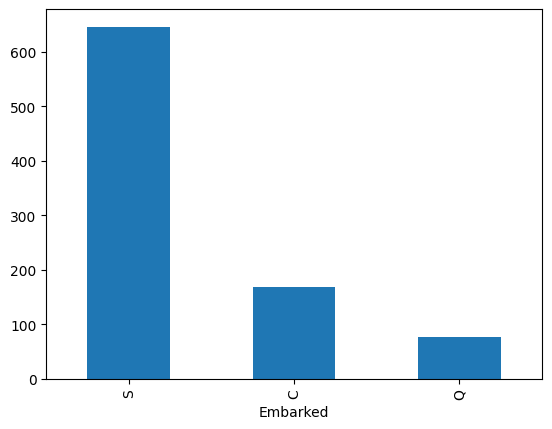

In [58]:
train['Embarked'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

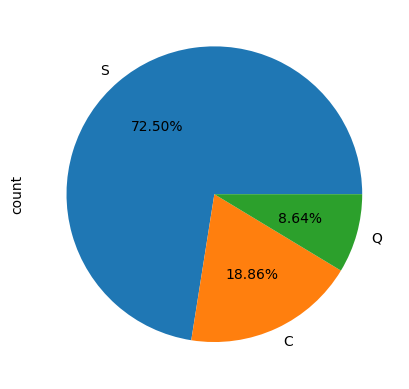

In [59]:
train['Embarked'].value_counts().plot(kind='pie', autopct='%.2f%%')

In [60]:
train['Embarked'].isnull().sum()

0

The null / NA data is already fill with 'S' type

#### Embarked
**Observation**
- Mostly (72%) are starting their journey from S and very less (8%) are starting from Q
- There are 2 missing values in this column and I fill the NA with the 'S' the most occur type in Embarked column

### Cabin

In [61]:
train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [62]:
train['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [63]:
train['Cabin'].loc[train['Cabin'].isna()]

0      NaN
2      NaN
4      NaN
5      NaN
7      NaN
      ... 
884    NaN
885    NaN
886    NaN
888    NaN
890    NaN
Name: Cabin, Length: 687, dtype: object

In [64]:
train['Cabin'].isna().sum()

687

In [65]:
train['Cabin'] = train['Cabin'].dropna()

In [66]:
train['Cabin'].isna().sum()

687

In [67]:
train = train.drop(columns=['Cabin'])

Because there are many null values in Cabin column, I just drop the Cabin column from the Train dataset

### Interesting Insights

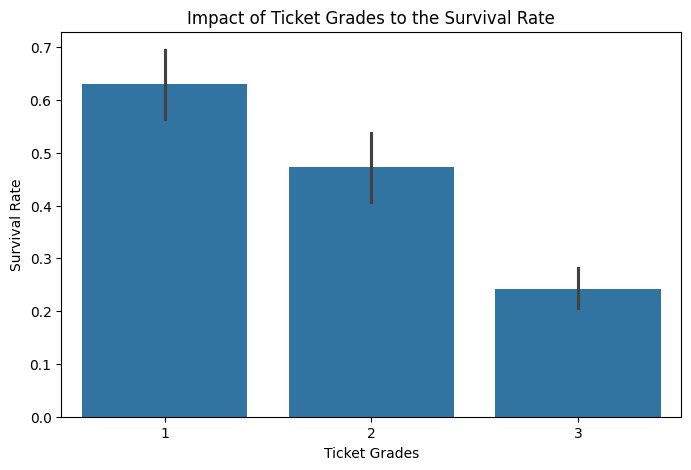

In [68]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Pclass", y="Survived", data=train)
plt.title("Impact of Ticket Grades to the Survival Rate")
plt.xlabel("Ticket Grades")
plt.ylabel("Survival Rate")
plt.show()


Based on this plot, the upper class ticket will have higher (Class 1) survival rate followed by the middle (Class 2) class and then the lower (Class 3) class ticket.

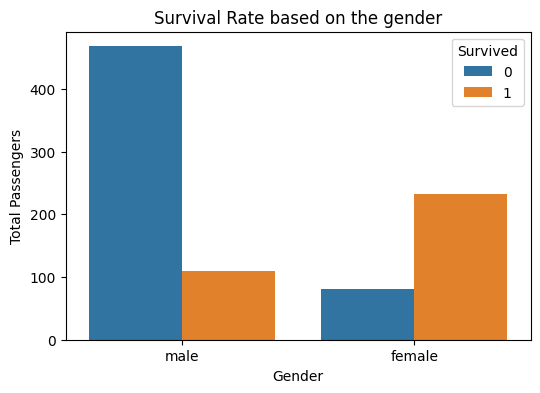

In [69]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Sex", hue="Survived", data=train)
plt.title("Survival Rate based on the gender")
plt.xlabel("Gender")
plt.ylabel("Total Passengers")
plt.show()

Based on this plot, we can see that female mostly survived in the titanic tragedy. Because in that moment, maybe we have principle to serve ladies first.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10156\1747788771.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="SibSp", y="Survived", data=train, ci=None)


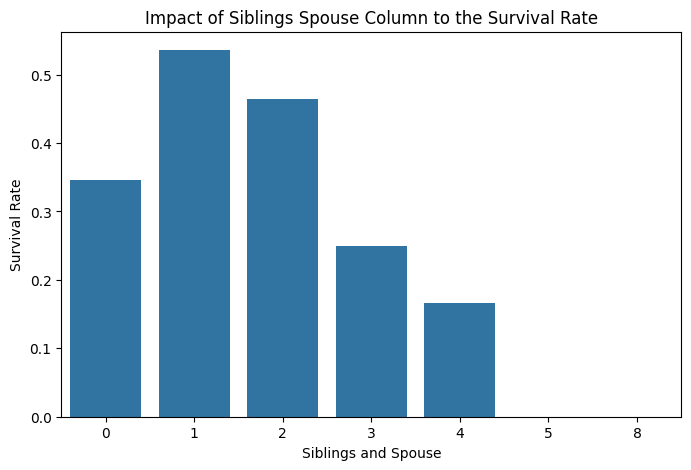

In [70]:
plt.figure(figsize=(8, 5))
sns.barplot(x="SibSp", y="Survived", data=train, ci=None)
plt.title("Impact of Siblings Spouse Column to the Survival Rate")
plt.xlabel("Siblings and Spouse")
plt.ylabel("Survival Rate")
plt.show()

Based on that plot, we can see number of siblings or spouse not really affecting the survival rate. The most feature that affect the survival rate is the Grade Class Ticket

### Encoding Parts

In [71]:
from sklearn.preprocessing import OneHotEncoder

# Encoding "Sex" (Binary Encoding: Male=0, Female=1)
train["Sex"] = train["Sex"].map({"male": 0, "female": 1})

# Encoding "Embarked" menggunakan One-Hot Encoding
train = pd.get_dummies(train, columns=["Embarked"], drop_first=True)

print(train.head())  # Cek hasil encoding


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500       False        True  
1          PC 17599  71.2833       False       False  
2  STON/O2. 3101282   7.9250       False        True  
3            113803  53.1000       False        True  
4            373450  

- For the Sex column, I will use mapping because there are only 2 gender which are Male and Female (Binary).
- However, for the Embarked column, I will use One-Hot Encoding to avoid ordinal bias.

### Normalization

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train[["Age", "Fare"]] = scaler.fit_transform(train[["Age", "Fare"]])

print(train[["Age", "Fare"]].head())

        Age      Fare
0 -0.592481 -0.502445
1  0.638789  0.786845
2 -0.284663 -0.488854
3  0.407926  0.420730
4  0.407926 -0.486337


I'm using StandardScaler for normalize the Age and Fare columns because by using that it will work more optimal when I am using KNN or Logistic Regression later.

### Handling Missing Values (Clean the Data)

In [73]:
train.drop("Ticket", axis=1, inplace=True)
train.drop("Fare", axis=1, inplace=True)
train.drop("PassengerId", axis=1, inplace=True)
train.drop("Name", axis=1, inplace=True)
train.drop("SibSp", axis=1, inplace=True)
train.drop("Parch", axis=1, inplace=True)


In [74]:
train.drop("Embarked_Q", axis=1, inplace=True)
train.drop("Embarked_S", axis=1, inplace=True)

In [75]:
train

,Survived,Pclass,Sex,Age
0,0,3,0,-0.592481
1,1,1,1,0.638789
2,1,3,1,-0.284663
3,1,1,1,0.407926
4,0,3,0,0.407926
...,...,...,...,...
886,0,2,0,-0.207709
887,1,1,1,-0.823344
888,0,3,1,0.000000
889,1,1,0,-0.284663


So based on the EDA and Data Preprocessing I'm just using 3 features which are PClass (Passenger Classes , Upper (1), Medium (2), Lower (3)), Sex (Male and Female), and Age.

## Logistic Regression

<ul>
    <li>Split the dataset into a training set and a testing set to evaluate your model's performance (70:30).</li>
    <li>Develop a logistic regression model using your selected features.</li>
    <li>Evaluate the performance of your logistic regression model using metrics such as accuracy, precision, recall, and the ROC-AUC score.</li>
    <li>Provide a detailed analysis of the confusion matrix to understand the true positives, false positives, true negatives, and false negatives.</li>
</ul>

### Import Library

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report

### Split Validation

In [77]:
# Load dataset
df = pd.read_csv("train.csv")

# Drop unnecessary columns
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

# Handling missing values
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Encode categorical variables
le_sex = LabelEncoder()
df["Sex"] = le_sex.fit_transform(df["Sex"])
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

# Define features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train[["Age", "Fare"]] = scaler.fit_transform(X_train[["Age", "Fare"]])
X_test[["Age", "Fare"]] = scaler.transform(X_test[["Age", "Fare"]])

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Model Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}\n")

Model Performance Metrics:
Accuracy: 0.7985
Precision: 0.7426
Recall: 0.7282
ROC-AUC Score: 0.8495



C:\Users\ASUS\AppData\Local\Temp\ipykernel_10156\1472830269.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10156\1472830269.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [83]:
y_test

625    0
566    0
459    0
804    1
338    1
      ..
184    1
607    1
624    0
103    0
387    1
Name: Survived, Length: 268, dtype: int64

### Confusion Matrix and Classification Report

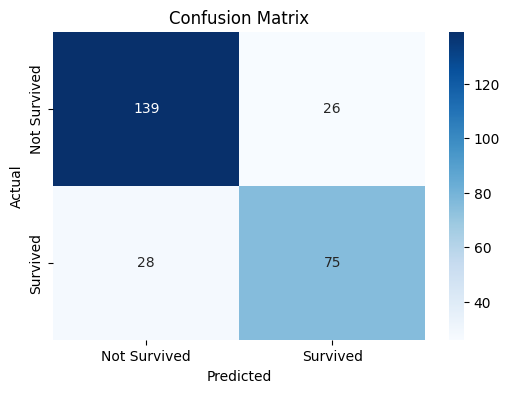

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       165
           1       0.74      0.73      0.74       103

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [78]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

### Cross Validation

In [79]:
# Load dataset
df = pd.read_csv("train.csv")

# Drop unnecessary columns
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

# Handling missing values
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Encode categorical variables
le_sex = LabelEncoder()
df["Sex"] = le_sex.fit_transform(df["Sex"])
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

# Define features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Standardize numerical features
scaler = StandardScaler()
X[["Age", "Fare"]] = scaler.fit_transform(X[["Age", "Fare"]])

# Cross-validation setup
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
model = LogisticRegression()

# Evaluate model with cross-validation
accuracy_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
precision_scores = cross_val_score(model, X, y, cv=kf, scoring='precision')
recall_scores = cross_val_score(model, X, y, cv=kf, scoring='recall')
roc_auc_scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc')

print("Model Performance Metrics (Cross-Validation):")
print(f"Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
print(f"Precision: {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
print(f"Recall: {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")
print(f"ROC-AUC Score: {np.mean(roc_auc_scores):.4f} ± {np.std(roc_auc_scores):.4f}\n")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10156\1844325370.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10156\1844325370.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Model Performance Metrics (Cross-Validation):
Accuracy: 0.7968 ± 0.0322
Precision: 0.7499 ± 0.0437
Recall: 0.7072 ± 0.0729
ROC-AUC Score: 0.8539 ± 0.0453



### Confusion Matrix and Classification Report

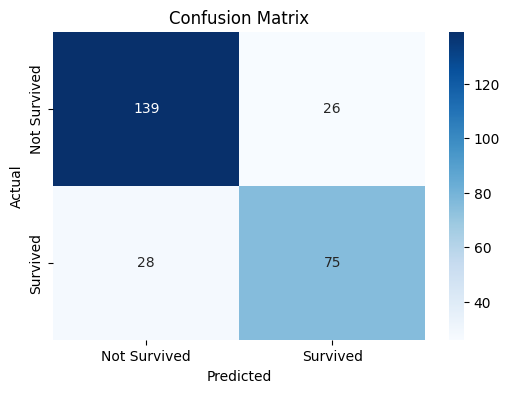

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       165
           1       0.74      0.73      0.74       103

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [80]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

### Hyperparameter Tuning

In [81]:
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

print("Best Hyperparameters:")
print(grid_search.best_params_)
print(f"Best Accuracy: {grid_search.best_score_:.4f}")

Best Hyperparameters:
{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy: 0.8001


## Conclusion



#### 1. Results from Split Validation
In split validation, the dataset is divided into 70% training and 30% testing. The results are:

- Accuracy: 0.7985 → The model correctly predicts 79.85% of the test data.
- Precision: 0.7426 → 74.26% of predicted survivors actually survived.
- Recall: 0.7282 → The model identifies 72.82% of actual survivors.
- ROC-AUC Score: 0.8495 → The model effectively differentiates between survivors and non-survivors.

##### Interpretation
- High accuracy (~80%) indicates a well-performing model.
- Precision (~74%) suggests that false positives are well-controlled.
- Recall (~73%) is reasonable, but some actual survivors are missed.
- ROC-AUC (~85%) confirms good classification capability.

#### 2. Results from Cross-Validation (10-Fold)
Using Stratified K-Fold (10 folds), the model is trained and tested multiple times:

- Accuracy: 0.7968 ± 0.0322 → Similar to split validation, with ~3.22% variation.
- Precision: 0.7499 ± 0.0437 → More stable across folds.
- Recall: 0.7072 ± 0.0729 → Slightly lower than split validation, with higher variability.
- ROC-AUC Score: 0.8539 ± 0.0453 → Slightly better in distinguishing survivors.

##### Interpretation
- Cross-validation is more reliable, as it assesses performance on multiple data subsets.
- Accuracy (~79.68%) is consistent with split validation.
- Precision is slightly better, indicating careful survivor predictions.
- Higher ROC-AUC (85.39%) suggests better overall discrimination.

### 3. Conclusion: Which is Better?
| Metric      | Split Validation | Cross Validation |
|---------------|-----------------|------------------|
| Accuracy  | 0.7985          | 0.7968 ± 0.0322 |
| Precision | 0.7426          | 0.7499 ± 0.0437 |
| Recall    | 0.7282          | 0.7072 ± 0.0729 |
| ROC-AUC   | 0.8495          | 0.8539 ± 0.0453 |

✅ Best Choice: Cross-Validation
- More reliable as it evaluates on multiple data splits.
- More stable performance despite slight recall fluctuations.
- Slightly higher ROC-AUC, meaning better survivor classification.

If computational time is a concern, split validation is a quicker alternative, but cross-validation is recommended for better generalization.

### 4. Model Improvement Suggestions
1. Adjusting prediction threshold to optimize precision vs recall trade-off.
2. Trying other models like Random Forest or Gradient Boosting for potential improvements.
3. Enhancing feature engineering to extract better predictive variables.